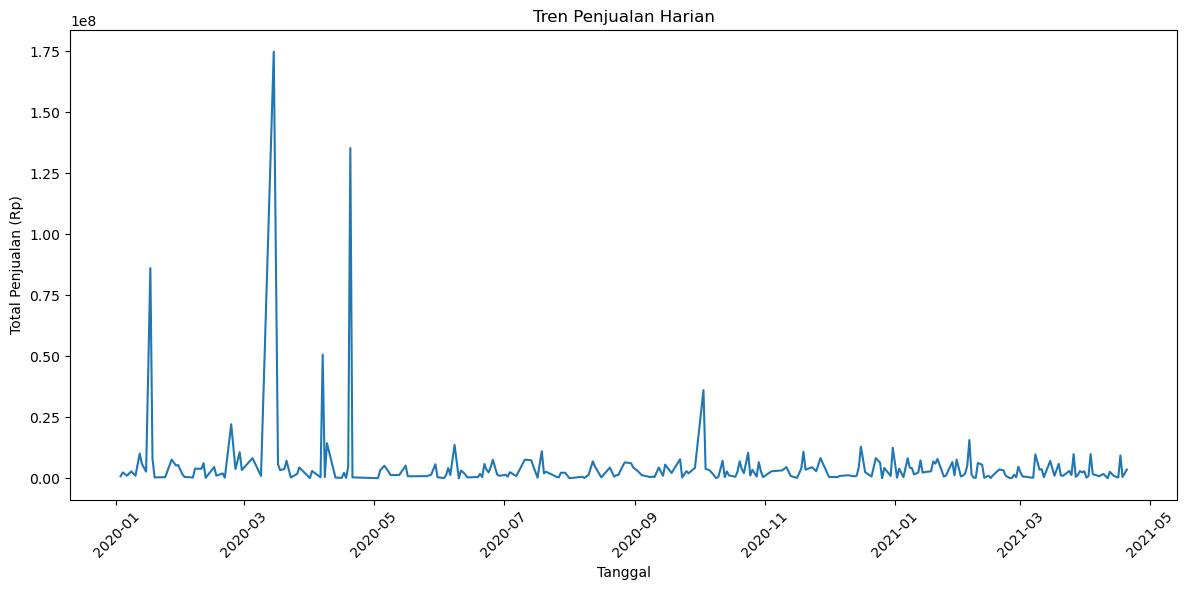

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca data
df = pd.read_excel("Tokokita.xlsx")

# Konversi kolom Tanggal ke datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Hitung total penjualan harian
daily_sales = df.groupby('Tanggal')['Penjualan'].sum().reset_index()

# Plot tren penjualan
plt.figure(figsize=(12,6))
plt.plot(daily_sales['Tanggal'], daily_sales['Penjualan'])
plt.title('Tren Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan (Rp)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

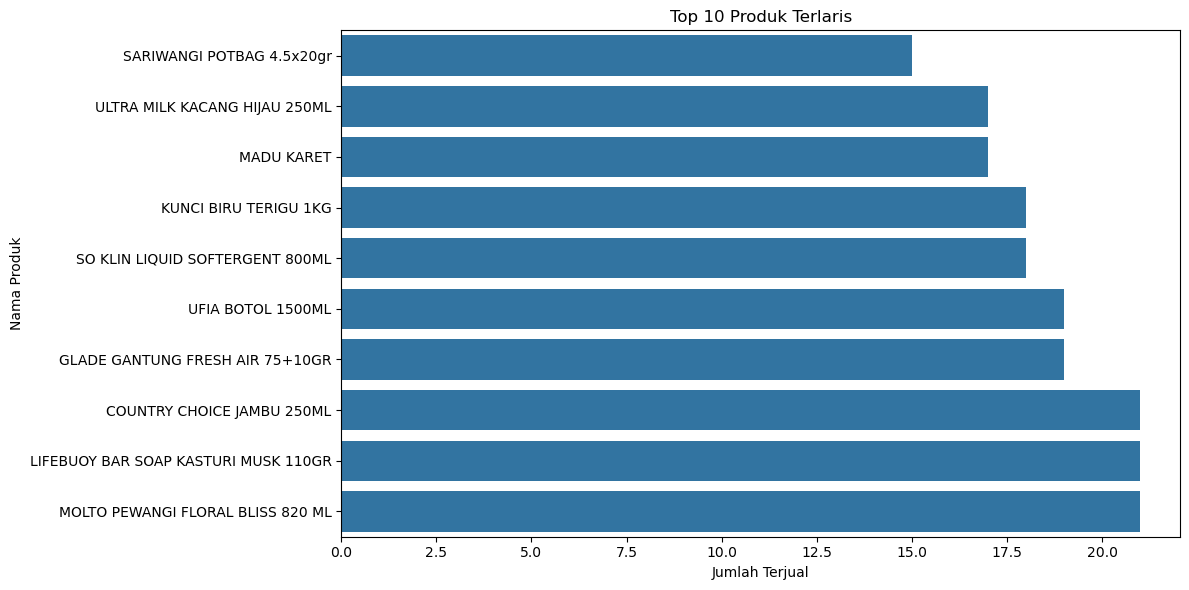

In [8]:
# Hitung total penjualan per produk
product_sales = df.groupby('Nama Barang')['Qty'].sum().sort_values()

# Visualisasi top 10 produk
plt.figure(figsize=(12,6))
sns.barplot(x=product_sales.head(10).values, y=product_sales.head(10).index)
plt.title('Top 10 Produk Terlaris')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Nama Produk')
plt.tight_layout()
plt.show()

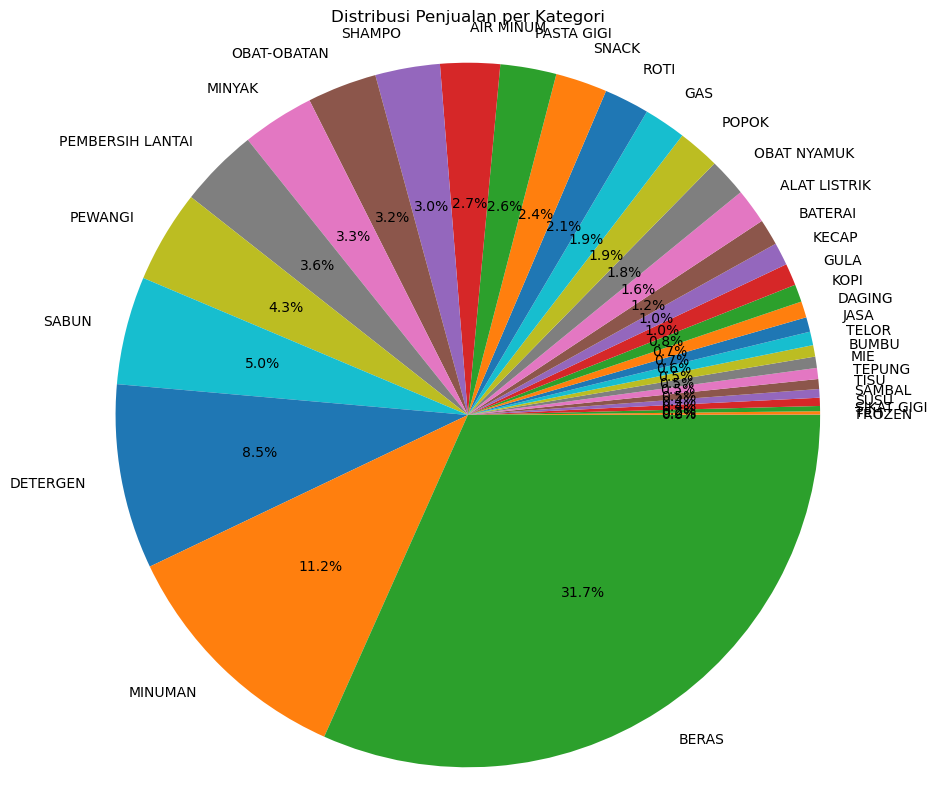

In [9]:
# Hitung total penjualan per kategori
category_sales = df.groupby('Kategori')['Penjualan'].sum().sort_values()

# Visualisasi dengan pie chart
plt.figure(figsize=(10,10))
plt.pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%')
plt.title('Distribusi Penjualan per Kategori')
plt.axis('equal')
plt.show()

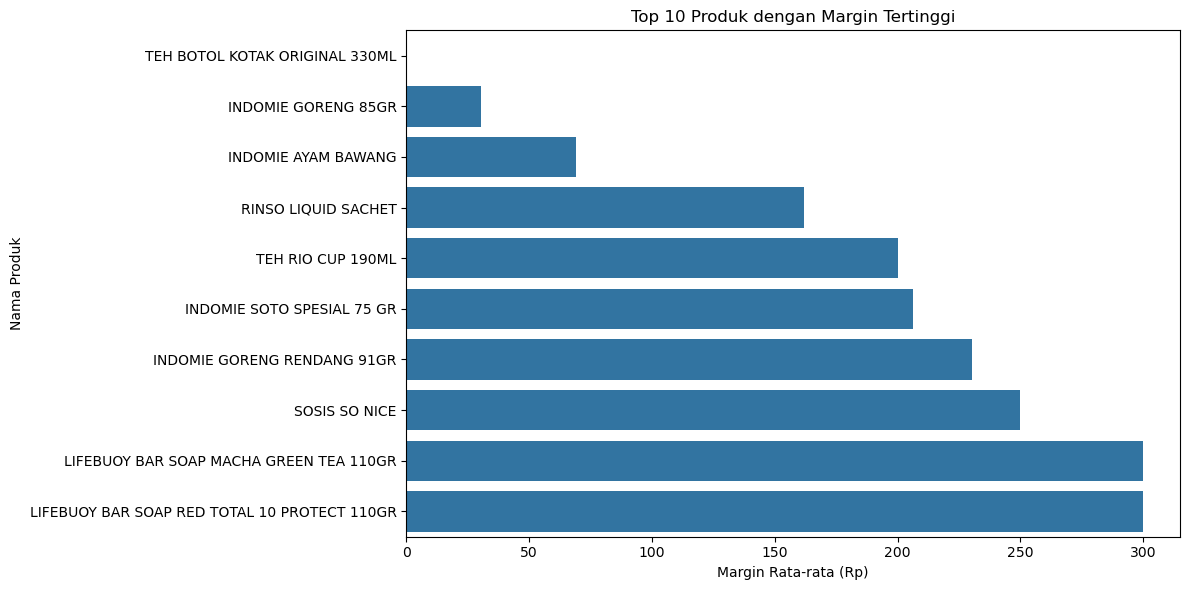

In [10]:
# Hitung rata-rata margin per produk
df['Margin'] = df['Jual(Rp)'] - df['Beli(Rp)']
avg_margin = df.groupby('Nama Barang')['Margin'].mean().sort_values()

# Visualisasi top 10 produk dengan margin tertinggi
plt.figure(figsize=(12,6))
sns.barplot(x=avg_margin.head(10).values, y=avg_margin.head(10).index)
plt.title('Top 10 Produk dengan Margin Tertinggi')
plt.xlabel('Margin Rata-rata (Rp)')
plt.ylabel('Nama Produk')
plt.tight_layout()
plt.show()

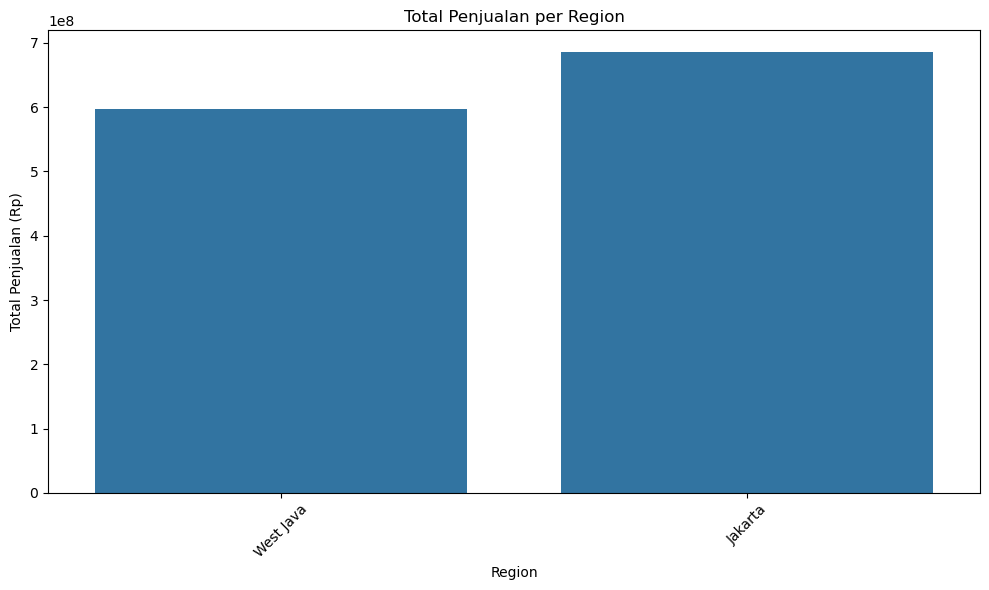

In [11]:
# Hitung total penjualan per region
region_sales = df.groupby('Region')['Penjualan'].sum().sort_values()

# Visualisasi dengan bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title('Total Penjualan per Region')
plt.xlabel('Region')
plt.ylabel('Total Penjualan (Rp)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
import plotly.express as px
import pandas as pd
import numpy as np

# Baca data
df = pd.read_excel("/home/muhammadkrisnanda/Downloads/Tokokita.xlsx")
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Buat pivot table untuk heatmap
pivot = df.pivot_table(values='Penjualan', index=df['Tanggal'].dt.dayofweek, 
                       columns=df['Tanggal'].dt.month, aggfunc='sum')

# Bikin mapping bulan
bulan_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'Mei', 6:'Jun', 
             7:'Jul', 8:'Agu', 9:'Sep', 10:'Okt', 11:'Nov', 12:'Des'}

# Bikin list label x yang sesuai dengan data
x_labels = [bulan_map[bulan] for bulan in pivot.columns]

# Update kode untuk bikin heatmap
fig = px.imshow(pivot, labels=dict(x="Bulan", y="Hari", color="Penjualan"),
                x=x_labels,  # Pake x_labels yang udah kita bikin
                y=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'],
                title="Heatmap Penjualan Harian")
fig.update_layout(height=500, width=700)
fig.show()

In [6]:
import plotly.express as px

# Hitung total penjualan per kategori dan produk
sales_data = df.groupby(['Kategori', 'Nama Barang'])['Penjualan'].sum().reset_index()

# Buat treemap
fig = px.treemap(sales_data, path=['Kategori', 'Nama Barang'], values='Penjualan',
                 title='Kontribusi Penjualan per Kategori dan Produk')
fig.update_layout(height=700, width=900)
fig.show()

In [7]:
import plotly.express as px

# Hitung rata-rata harga jual dan total kuantitas terjual per produk
product_data = df.groupby('Nama Barang').agg({
    'Jual(Rp)': 'mean',
    'Qty': 'sum',
    'Kategori': 'first'  # Ambil kategori pertama untuk setiap produk
}).reset_index()

# Buat scatter plot
fig = px.scatter(product_data, x='Jual(Rp)', y='Qty', color='Kategori',
                 hover_name='Nama Barang', size='Qty',
                 labels={'Jual(Rp)': 'Harga Jual Rata-rata', 'Qty': 'Total Kuantitas Terjual'},
                 title='Hubungan Harga Jual dan Kuantitas Terjual')
fig.update_layout(height=600, width=900)
fig.show()

In [9]:
import plotly.graph_objects as go

# Hitung total penjualan harian
daily_sales = df.groupby('Tanggal')['Penjualan'].sum().reset_index()

# Hitung moving average 7 hari
daily_sales['MA7'] = daily_sales['Penjualan'].rolling(window=7).mean()

# Buat plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=daily_sales['Tanggal'], y=daily_sales['Penjualan'],
                         mode='lines', name='Penjualan Harian'))
fig.add_trace(go.Scatter(x=daily_sales['Tanggal'], y=daily_sales['MA7'],
                         mode='lines', name='Moving Average 7 Hari', line=dict(color='red')))

fig.update_layout(title='Trend Penjualan Harian dengan Moving Average 7 Hari',
                  xaxis_title='Tanggal', yaxis_title='Total Penjualan (Rp)',
                  height=500, width=900)
fig.show()

In [12]:
import plotly.graph_objects as go

# Hitung total penjualan per produk
product_sales = df.groupby('Nama Barang')['Penjualan'].sum().sort_values().reset_index()

# Hitung persentase kumulatif
product_sales['Cumulative Percentage'] = product_sales['Penjualan'].cumsum() / product_sales['Penjualan'].sum() * 100

# Buat Pareto chart
fig = go.Figure([go.Bar(x=product_sales['Nama Barang'], y=product_sales['Penjualan'], name='Penjualan'),
                 go.Scatter(x=product_sales['Nama Barang'], y=product_sales['Cumulative Percentage'], 
                            mode='lines', name='Persentase Kumulatif', yaxis='y2')])

fig.update_layout(title='Analisis Pareto: Kontribusi Produk terhadap Total Penjualan',
                  xaxis_title='Produk', yaxis_title='Total Penjualan (Rp)',
                  yaxis2=dict(title='Persentase Kumulatif', overlaying='y', side='right'),
                  height=600, width=1000)
fig.show()

In [13]:
import plotly.graph_objects as go
import pandas as pd

# Hitung total penjualan dan jumlah transaksi per kota
city_performance = df.groupby('City').agg({
    'Penjualan': 'sum',
    'Tanggal': 'count',  # Jumlah transaksi
    'Qty': 'sum'
}).reset_index()

# Normalisasi data untuk radar chart
for col in ['Penjualan', 'Tanggal', 'Qty']:
    city_performance[f'{col}_normalized'] = (city_performance[col] - city_performance[col].min()) / (city_performance[col].max() - city_performance[col].min())

# Buat radar chart
fig = go.Figure()

for city in city_performance['City']:
    fig.add_trace(go.Scatterpolar(
        r=city_performance.loc[city_performance['City'] == city, ['Penjualan_normalized', 'Tanggal_normalized', 'Qty_normalized']].values[0],
        theta=['Total Penjualan', 'Jumlah Transaksi', 'Total Quantity'],
        fill='toself',
        name=city
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    showlegend=True,
    title='Perbandingan Performa Antar Kota',
    height=600, width=800
)

fig.show()

In [14]:
import plotly.graph_objects as go
import pandas as pd

# Persiapkan data untuk Sankey diagram
df_sankey = df.groupby(['Kategori', 'City'])['Penjualan'].sum().reset_index()

# Buat list unik untuk kategori dan kota
categories = df_sankey['Kategori'].unique().tolist()
cities = df_sankey['City'].unique().tolist()

# Buat mapping untuk node
node_labels = categories + cities
node_mapping = {node: index for index, node in enumerate(node_labels)}

# Buat source, target, dan value untuk Sankey
source = [node_mapping[cat] for cat in df_sankey['Kategori']]
target = [node_mapping[city] + len(categories) for city in df_sankey['City']]
value = df_sankey['Penjualan'].tolist()

# Buat Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = node_labels,
      color = "blue"
    ),
    link = dict(
      source = source,
      target = target,
      value = value
  ))])

fig.update_layout(title_text="Alur Penjualan dari Kategori ke Kota", font_size=10, height=600, width=1000)
fig.show()

In [23]:
import plotly.graph_objects as go
import pandas as pd

# Read data from a csv
z_data = pd.read_excel("/home/muhammadkrisnanda/Downloads/Tokokita.xlsx")

fig = go.Figure(data=go.Surface(z=z_data, showscale=False))
fig.update_layout(
    title='Mt Bruno Elevation',
    width=400, height=400,
    margin=dict(t=40, r=0, l=20, b=20)
)

name = 'default'
# Default parameters which are used when `layout.scene.camera` is not provided
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.25, y=1.25, z=1.25)
)

fig.update_layout(scene_camera=camera, title=name)
fig.show()